In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
%matplotlib inline

/Users/macbook/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loaded 2122 images of 12 classes
(2122, 128, 128)


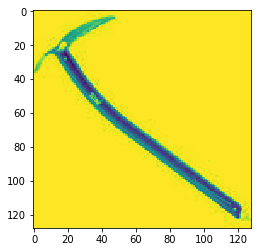

In [2]:
classNames = []
features = []
labels = []

classNameId = 0

rootdir = "resizedGearImages"

classNames = os.listdir(rootdir)

for folder in classNames:
    files = os.listdir(os.path.join(rootdir,folder))
    for file in files:
        img = Image.open(os.path.join(rootdir,folder,file)).convert('L')
        features.append(np.array(img))
        labels.append(classNameId)
    classNameId+=1
    
features = np.array(features)
labels = np.array(labels)

print("Loaded {} images of {} classes".format(len(features),len(classNames)))

print(features.shape)
plt.figure()
plt.imshow(features[0])
plt.grid(False)

In [3]:
# split the image data into training and testing sets
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size=0.30)

xTrain = xTrain / 255.0
xTest = xTest / 255.0

print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(1485, 128, 128)
(637, 128, 128)
(1485,)
(637,)


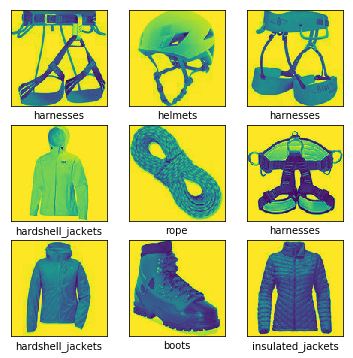

In [4]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xTrain[i])
    plt.xlabel(classNames[yTrain[i]])

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),  
    keras.layers.Dense(64, activation=tf.nn.relu),  
    keras.layers.Dense(12, activation=tf.nn.softmax)
])

In [6]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(xTrain, yTrain, epochs=5, validation_data=(xTest, yTest))

Train on 1485 samples, validate on 637 samples
Epoch 1/5
1485/1485 [==============================] - 4s 2ms/step - loss: 4.5871 - acc: 0.2970 - val_loss: 2.2819 - val_acc: 0.5510
Epoch 2/5
1485/1485 [==============================] - 2s 2ms/step - loss: 1.7996 - acc: 0.5939 - val_loss: 1.2833 - val_acc: 0.5714
Epoch 3/5
1485/1485 [==============================] - 3s 2ms/step - loss: 1.0995 - acc: 0.6370 - val_loss: 1.0517 - val_acc: 0.6562
Epoch 4/5
1485/1485 [==============================] - 3s 2ms/step - loss: 0.8309 - acc: 0.7333 - val_loss: 0.8867 - val_acc: 0.7017
Epoch 5/5
1485/1485 [==============================] - 3s 2ms/step - loss: 0.7261 - acc: 0.7690 - val_loss: 1.0923 - val_acc: 0.6829


In [8]:
testLoss, testAcc = model.evaluate(xTest, yTest)

print('Test accuracy:', testAcc)

637/637 [==============================] - 0s 670us/step
Test accuracy: 0.6828885407799642


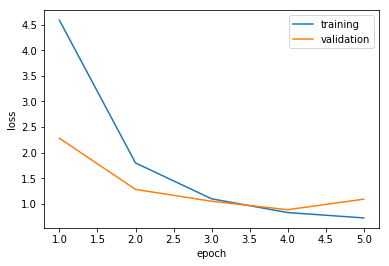

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

epochNums = range(1,6)
trainingLoss = history.history["loss"]
validationLoss = history.history["val_loss"]
plt.plot(epochNums, trainingLoss)
plt.plot(epochNums, validationLoss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

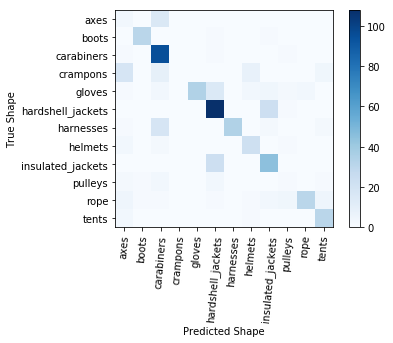

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

predictions = model.predict(xTest)
highestPredictions = np.argmax(predictions, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(yTest, highestPredictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tickMarks = np.arange(len(classNames))
plt.xticks(tickMarks, classNames, rotation=85)
plt.yticks(tickMarks, classNames)
plt.xlabel("Predicted Shape")
plt.ylabel("True Shape")
plt.show()

In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(12), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

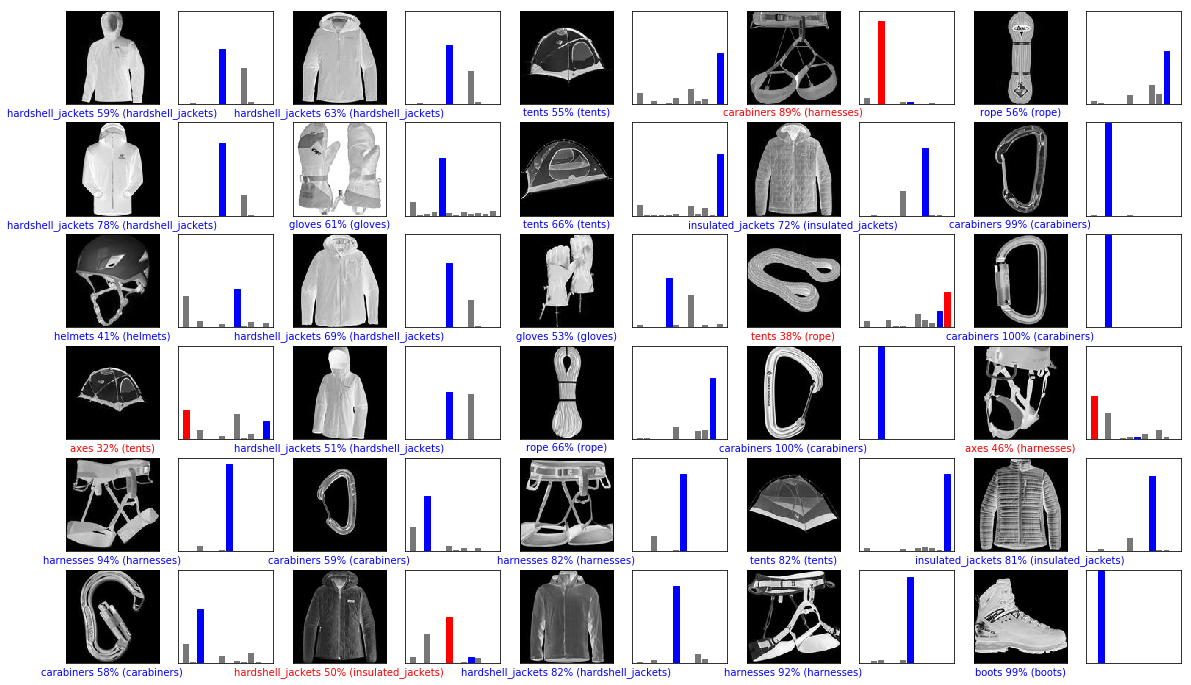

In [12]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
numRows = 6
numCols = 5
numImages = numRows*numCols
plt.figure(figsize=(2*2*numCols, 2*numRows))
for i in range(numImages):
  plt.subplot(numRows, 2*numCols, 2*i+1)
  plot_image(i, predictions, yTest, xTest)
  plt.subplot(numRows, 2*numCols, 2*i+2)
  plot_value_array(i, predictions, yTest)

In [13]:
from keras.models import load_model
model.save('challenge4.h5')  # creates a HDF5 file 'my_model.h5'

Using TensorFlow backend.
